In [128]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [129]:
# Checking version of Tensorflow ans Keras
print(f"Tensor flow version {tf.__version__}")
print(f"keras flow version {tf.keras.__version__}")

Tensor flow version 2.10.0
keras flow version 2.10.0


In [130]:
os.getcwd()

'C:\\Users\\aareb\\DataScience\\Deep Learning\\may17-22'

## Creating a simpler classifier using Keras on MNIST data

In [131]:
mnist=tf.keras.datasets.mnist

In [132]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\aareb\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [133]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [134]:
X_train_full.shape

(60000, 28, 28)

In [135]:
y_train_full.shape

(60000,)

In [136]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [137]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [138]:
X_train_full[0].shape

(28, 28)

In [139]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [140]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [141]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid,X_train=X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.

In [142]:
X_valid.shape,X_train.shape,X_train_full.shape,y_valid.shape, y_train.shape,y_train_full.shape

((5000, 28, 28), (55000, 28, 28), (60000, 28, 28), (5000,), (55000,), (60000,))

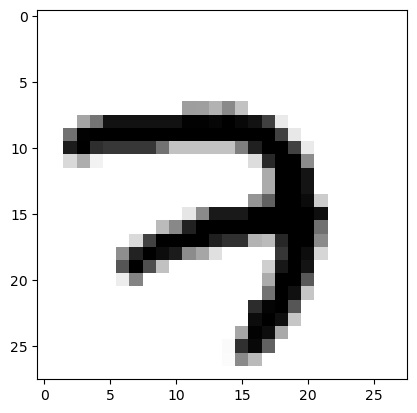

In [143]:
# Lets view some data 
plt.imshow(X_train[0],cmap="binary")
plt.show()

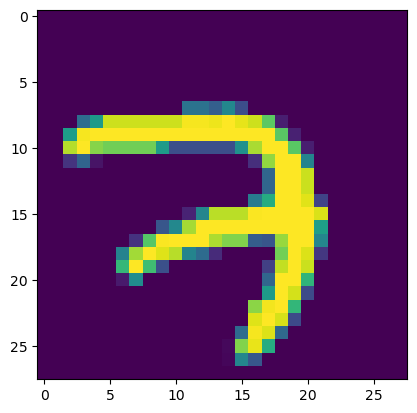

In [144]:
# Lets view some data 
plt.imshow(X_train[0])
plt.show()

<Axes: >

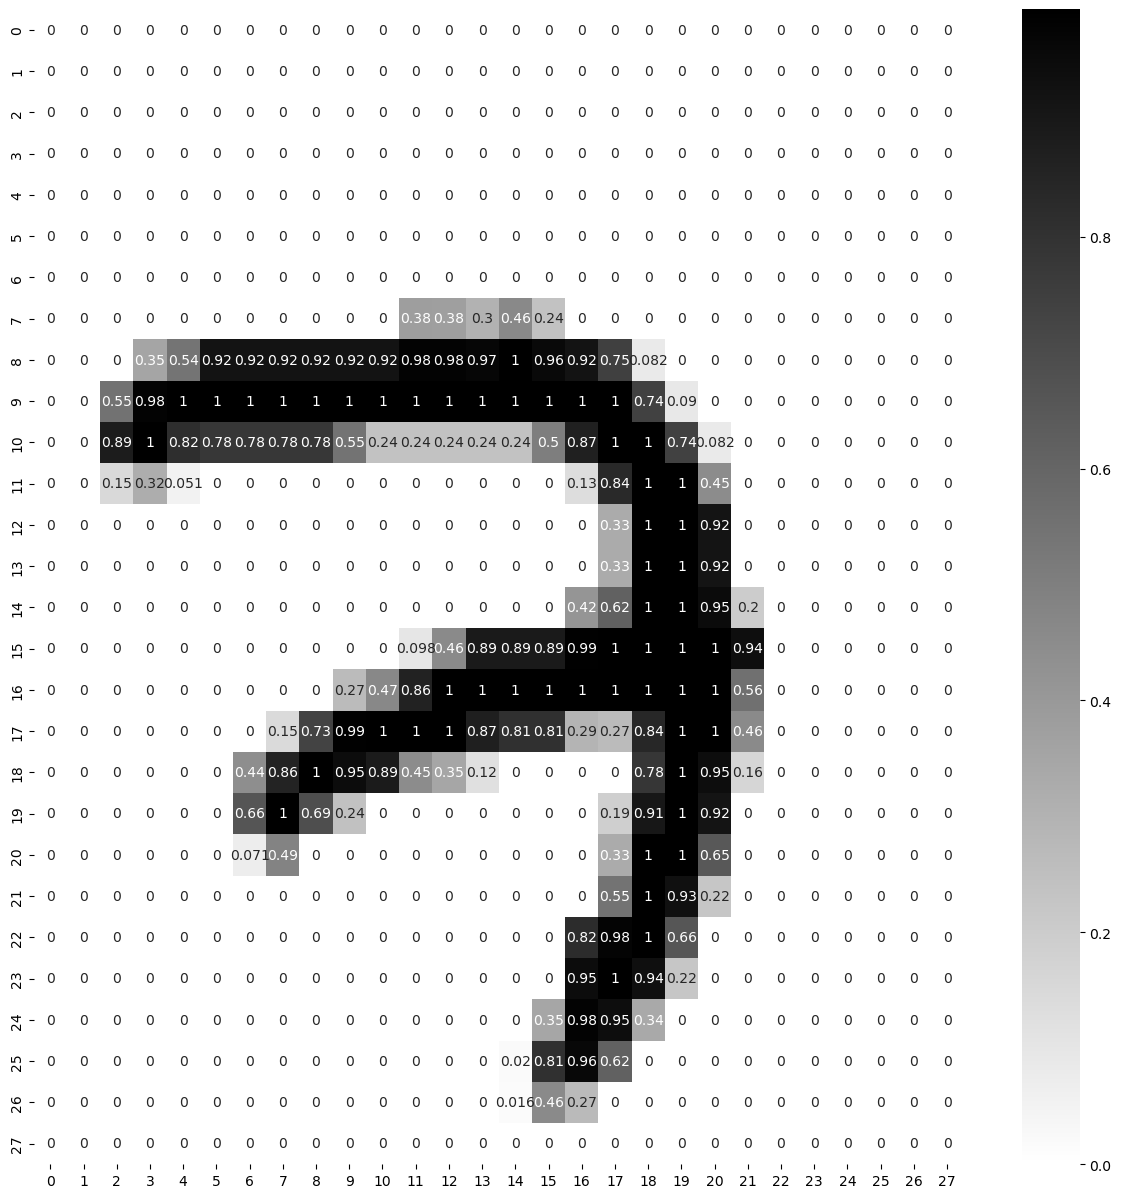

In [145]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0],annot=True,cmap="binary")

In [146]:
# METHOD # 1

from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from tensorflow.keras import regularizers

# Creating layers of ANN
LAYERS=[tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
        tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1",kernel_regularizer=regularizers.L2(1.0e-04)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2",kernel_regularizer=regularizers.L1L2(l1=1.0e-05,l2=1.0e-04)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

In [147]:
model_clf=tf.keras.models.Sequential(LAYERS)

In [148]:
# METHOD # 2

from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from tensorflow.keras import regularizers
from tensorflow.keras import initializers

In [149]:


# define the model

model_clf=Sequential()
model_clf.add(Flatten(input_shape=[28, 28], name="inputLayer")),
model_clf.add(Dense(64, activation="relu", name="hiddenLayer1",kernel_regularizer=regularizers.L2(1.0e-04),kernel_initializer=tf.keras.initializers.HeNormal(seed=None))),
model_clf.add(Dropout(0.2)),
model_clf.add(Dense(32, activation="relu", name="hiddenLayer2",kernel_regularizer=regularizers.L1L2(l1=1.0e-05,l2=1.0e-04),kernel_initializer=tf.keras.initializers.HeNormal(seed=None))),
model_clf.add(Dropout(0.2)),
model_clf.add(Dense(10, activation="softmax", name="outputLayer"))

In [150]:
model_clf.layers

In [151]:
model_clf.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 64)                50240     
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 hiddenLayer2 (Dense)        (None, 32)                2080      
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                                 
 outputLayer (Dense)         (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trai

In [152]:
hidden1=model_clf.layers[1]

In [153]:
hidden1.name

'hiddenLayer1'

In [154]:
hidden1.get_weights()[0].shape

(784, 64)

In [155]:
hidden1.get_weights()[1].shape

(64,)

In [156]:
hidden1.get_weights()[0] # weights

array([[ 0.02709885,  0.10710204,  0.03437458, ..., -0.02397749,
        -0.01158416,  0.00058991],
       [-0.03789032, -0.08030384, -0.08013625, ...,  0.04902952,
        -0.06964638,  0.02491131],
       [-0.0778712 ,  0.0427268 ,  0.02338419, ..., -0.00773513,
        -0.09549146,  0.01482195],
       ...,
       [ 0.07363798,  0.05135761,  0.02558606, ...,  0.00661527,
         0.04645758,  0.01431112],
       [ 0.00428451, -0.02507983,  0.07993691, ..., -0.07026529,
        -0.05121921, -0.02195885],
       [ 0.02836641,  0.09342007,  0.00342706, ...,  0.01632751,
         0.04850619, -0.00958927]], dtype=float32)

In [157]:
hidden1.get_weights()[1] # bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [158]:
hidden1.get_weights()

[array([[ 0.02709885,  0.10710204,  0.03437458, ..., -0.02397749,
         -0.01158416,  0.00058991],
        [-0.03789032, -0.08030384, -0.08013625, ...,  0.04902952,
         -0.06964638,  0.02491131],
        [-0.0778712 ,  0.0427268 ,  0.02338419, ..., -0.00773513,
         -0.09549146,  0.01482195],
        ...,
        [ 0.07363798,  0.05135761,  0.02558606, ...,  0.00661527,
          0.04645758,  0.01431112],
        [ 0.00428451, -0.02507983,  0.07993691, ..., -0.07026529,
         -0.05121921, -0.02195885],
        [ 0.02836641,  0.09342007,  0.00342706, ...,  0.01632751,
          0.04850619, -0.00958927]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]

In [159]:
hidden1.get_weights().shape()

AttributeError: 'list' object has no attribute 'shape'

In [160]:
hidden2=model_clf.layers[3]
hidden2.name

'hiddenLayer2'

In [161]:
hidden2.get_weights()[0].shape

(64, 32)

In [162]:
hidden2.get_weights()[1].shape

(32,)

In [163]:
weights,biases=hidden1.get_weights()

In [164]:
print("shape\n", weights.shape, "\n")
weights

shape
 (784, 64) 



array([[ 0.02709885,  0.10710204,  0.03437458, ..., -0.02397749,
        -0.01158416,  0.00058991],
       [-0.03789032, -0.08030384, -0.08013625, ...,  0.04902952,
        -0.06964638,  0.02491131],
       [-0.0778712 ,  0.0427268 ,  0.02338419, ..., -0.00773513,
        -0.09549146,  0.01482195],
       ...,
       [ 0.07363798,  0.05135761,  0.02558606, ...,  0.00661527,
         0.04645758,  0.01431112],
       [ 0.00428451, -0.02507983,  0.07993691, ..., -0.07026529,
        -0.05121921, -0.02195885],
       [ 0.02836641,  0.09342007,  0.00342706, ...,  0.01632751,
         0.04850619, -0.00958927]], dtype=float32)

In [165]:
print("shape\n", biases.shape, "\n")
biases

shape
 (64,) 



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [166]:
# Method 1

LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]


model_clf.compile(loss=LOSS_FUNCTION,
              optimizer="Adam",
              metrics=METRICS)

In [167]:
# Method 2

LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "Adam" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]


model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [168]:
# Method 3

LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "Adam" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
Adam=tf.keras.optimizers.Adam(learning_rate=0.01,beta_1=0.95) # for user defined learning_rate, beta_1
METRICS = ["accuracy"]

SGD=tf.keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.9)

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=Adam,
              metrics=METRICS)

## Tensor board call back functions

In [170]:
# Logging 
log_folder='logs'
%reload_ext tensorboard
!rm -rf logs
tb_cb=tf.keras.callbacks.TensorBoard(log_dir=log_folder,histogram_freq=1)

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
%reload_ext tensorboard

## early stopping call back

In [171]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=5)

## model check pointing call back

In [172]:
CKPT_path="model.ckpt.h5"
checkpointing_cb=tf.keras.callbacks.ModelCheckpoint(CKPT_path,save_best_only=True)

In [173]:
EPOCHS = 10
VALIDATION_SET = (X_valid, y_valid)

history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,batch_size=32,callbacks=[tb_cb,early_stopping_cb,checkpointing_cb])

Epoch 1/10
1719/1719 [==============================] - 7s 3ms/step - loss: 0.5723 - accuracy: 0.8588 - val_loss: 0.3644 - val_accuracy: 0.9372
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5228 - accuracy: 0.8917 - val_loss: 0.3865 - val_accuracy: 0.9338
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5286 - accuracy: 0.8947 - val_loss: 0.3720 - val_accuracy: 0.9366
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5281 - accuracy: 0.8963 - val_loss: 0.3632 - val_accuracy: 0.9430
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5240 - accuracy: 0.8977 - val_loss: 0.3606 - val_accuracy: 0.9474
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5362 - accuracy: 0.8942 - val_loss: 0.3508 - val_accuracy: 0.9458
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5314 - accuracy: 0.8966 - val_loss: 0.3619 - val_accuracy:

In [175]:
%tensorboard --logdir={log_folder} --port 6006

In [95]:
!kill 10976

kill: 10976: No such process


In [88]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [89]:
history

In [90]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.520513,0.897527,0.374304,0.9414
1,0.518509,0.898745,0.377092,0.9372
2,0.523170,0.896618,0.373153,0.9340
3,0.514800,0.899218,0.378098,0.9378
4,0.516005,0.897709,0.348880,0.9484
5,0.516458,0.899509,0.374704,0.9390
6,0.521349,0.897473,0.357128,0.9466
7,0.516501,0.900182,0.365479,0.9410
8,0.517408,0.898018,0.366285,0.9426
9,0.513567,0.899200,0.354649,0.9422


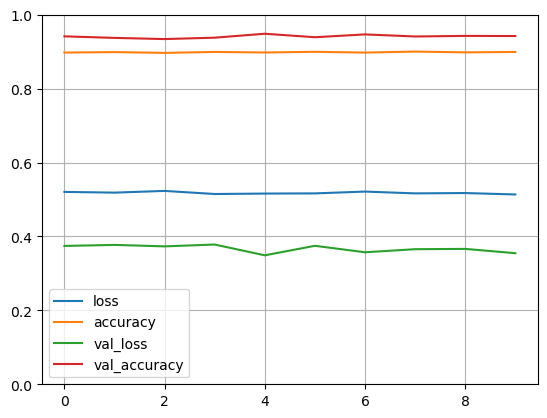

In [91]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [92]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3783 - accuracy: 0.9352


[0.3782865107059479, 0.9351999759674072]

## loading check point model

In [93]:
## loading check point model
ckpt_model=tf.keras.models.load_model(CKPT_path)

In [94]:
history=ckpt_model.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,batch_size=32,callbacks=[tb_cb,early_stopping_cb,checkpointing_cb])

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5242 - accuracy: 0.8966 - val_loss: 0.3392 - val_accuracy: 0.9474
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5238 - accuracy: 0.8955 - val_loss: 0.3424 - val_accuracy: 0.9488
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5278 - accuracy: 0.8956 - val_loss: 0.3539 - val_accuracy: 0.9446
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5256 - accuracy: 0.8963 - val_loss: 0.3748 - val_accuracy: 0.9388
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5245 - accuracy: 0.8982 - val_loss: 0.4017 - val_accuracy: 0.9326
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5251 - accuracy: 0.8985 - val_loss: 0.3800 - val_accuracy: 0.9350


In [ ]:
pd.DataFrame(history.history)

In [ ]:
ckpt_model.evaluate(X_test, y_test)

In [ ]:
ckpt_model.predict(X_test)

## Checking the plots

In [ ]:
x_new=X_test[:3]
# x_new

In [ ]:
x_new

In [ ]:
actual = y_test[:3]
actual

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(x_new[0],annot=True,cmap="binary")

In [ ]:
sns.heatmap(x_new[1],annot=True,cmap="binary")

In [ ]:
sns.heatmap(x_new[2],annot=True,cmap="binary")

In [ ]:
y_prob=ckpt_model.predict(x_new)

In [ ]:
y_prob

In [ ]:
y_prob.round(3)

In [ ]:
y_prob=np.argmax(y_prob,axis=-1)
y_prob

In [ ]:
y_prob1=ckpt_model.predict_classes(x_new)